# TensorFlow / Keras

TensorFlow와 Keras는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리입니다.

TensorFlow와 Keras는 모두 2015년에 릴리즈 되었습니다 (Keras는 2015년 3월, TensorFlow는 2015년 11월). 이는 딥러닝 세계의 관점에서 볼 때, 꽤 오랜시간이라고 볼 수 있습니다.

Keras는 사용자가 TensorFlow를 좀 더 쉽고 편하게 사용할 수 있게 해주는 high level API를 제공합니다.

TensorFlow 2.x에서는 Keras를 딥러닝의 공식 API로 채택하였고, Keras는 TensorFlow 내의 하나의 framwork으로 개발되고 있습니다.

## TensorFlow / Keras Basic

### TensorFlow / Keras import

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


### TensorFlow / Keras 맛보기

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# MNIST dataset download
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Model 생성, compile
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Training / Evaluation
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2954 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1424 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1071 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0658 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9801
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0542 - accuracy: 0.9818
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0498 - accuracy: 0.9835
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0701 

[0.07007749378681183, 0.9805999994277954]

데이터를 탐색해봅시다:

In [7]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

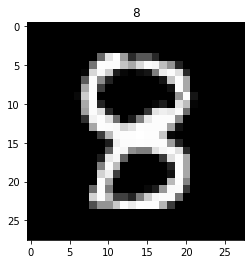

In [8]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

내가 쓴 손글씨로 Test 해봅시다.

Colab을 쓰는 경우에는 아래 cell을 실행하면 파일을 업로드할 수 있습니다.

그림판과 같은 도구를 이용하여 손으로 숫자를 쓴 다음 파일로 저장하고 업로드 합니다.

이 때 파일명은 image.png로 합니다.

In [9]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

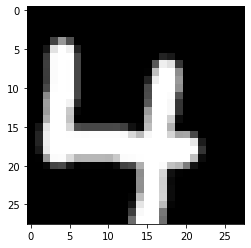

In [10]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [11]:
# shape을 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image, (1, 28, 28))
print(model.predict(image))

print("Model이 예측한 값은 {} 입니다.".format(np.argmax(model.predict(image), -1)))

1/1 [==============================] - 0s 57ms/step
[[7.6566910e-13 2.3402408e-10 2.5378697e-04 6.6495576e-04 7.9151947e-04
  6.0020847e-13 2.4049969e-09 9.9828976e-01 1.9371738e-21 2.6891785e-08]]
1/1 [==============================] - 0s 14ms/step
Model이 예측한 값은 [7] 입니다.


### Tensor

Tensor는 multi-dimensional array를 나타내는 말로, TensorFlow의 기본 data type입니다

In [12]:
# Hello World
hello = tf.constant([3,3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [13]:
# 상수형 tensor는 아래와 같이 만들 수 있습니다
# 출력해보면 tensor의 값과 함께, shape과 내부의 data type을 함께 볼 수 있습니다
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [14]:
# 아래와 같이 numpy ndarray나 python의 list도 tensor로 바꿀 수 있습니다
x_np = np.array([[1.0, 2.0],
                [3.0, 4.0]])
x_list = [[1.0, 2.0], 
         [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [15]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [16]:
# 반대로 tensor를 다음과 같이 numpy ndarray로 바꿀 수도 있습니다
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [17]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [18]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,2), 2)
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [19]:
d = tf.zeros_like(c)
e = tf.ones_like(c)
print(d)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [20]:
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [21]:
g  = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [22]:
h = tf.random.uniform((2,2)) # np.rand
i = tf.random.normal((2,2))  # np.randn
print(h)
print(i)

tf.Tensor(
[[0.4790256  0.43239546]
 [0.3586341  0.11045039]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.419305    0.58046365]
 [ 0.1653637  -0.79879403]], shape=(2, 2), dtype=float32)


#### Tensor의 속성

In [23]:
tensor = tf.random.normal((3,4))

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (3, 4)
Datatype of tensor: <dtype: 'float32'>


In [24]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (4, 3)
Datatype of tensor: <dtype: 'int32'>


### Variable

Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서입니다.
딥러닝에서는 학습해야하는 가중치(weight, bias)들을 variable로 생성합니다.

In [25]:
# tensor의 값 변경 - 변경 불가능
tensor = tf.ones((3,4))
print(tensor)

tensor[0,0] = 2.

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [26]:
# variable 만들기, 값 변경
variable = tf.Variable(tensor)
print(variable)

variable[0,0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [27]:
# 초기값을 사용해서 Variable을 생성할 수 있습니다
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.17036596,  0.3358804 ],
       [ 0.7975357 , -0.82900584]], dtype=float32)>


In [28]:
# 아래와 같이 variable을 초기화해주는 initializer들을 사용할 수도 있습니다
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.2977922 ,  0.16319183],
       [-0.13620298, -0.44742614]], dtype=float32)>


In [29]:
# variable은 `.assign(value)`, `.assign_add(increment)`, 또는 `.assign_sub(decrement)`
# 와 같은 메소드를 사용해서 Variable의 값을 갱신합니다:'''

new_value = tf.random.normal(shape=(2,2))
print(new_value)
weight.assign(new_value)
print(weight)

tf.Tensor(
[[-0.8006687  -0.9511177 ]
 [ 0.14912911  1.7424799 ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.8006687 , -0.9511177 ],
       [ 0.14912911,  1.7424799 ]], dtype=float32)>


In [30]:
added_value = tf.ones(shape=(2,2))
weight.assign_sub(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.8006687, -1.9511178],
       [-0.8508709,  0.7424799]], dtype=float32)>


### Indexing과 Slicing

In [31]:
a = tf.range(1, 13)
a = tf.reshape(a, (3, 4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [32]:
# indexing
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [33]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### Transpose

In [34]:
a = tf.range(16)
a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [35]:
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### Tensor 연산

In [36]:
x = tf.constant([[1,2], [3,4]], dtype=tf.float32)
y = tf.constant([[5,6], [7,8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [37]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.divide(x, y))
print(tf.matmul(x, y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [38]:
z = tf.range(1, 11)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [39]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [40]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [41]:
concat = tf.concat([z, z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [42]:
concat = tf.concat([z, z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [43]:
stack = tf.stack([z, z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [44]:
stack = tf.stack([z, z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [45]:
stack = tf.stack([z, z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


## Dataset

Data를 처리하여 model에 공급하기 위하여 TensorFlow에서는 tf.data.Dataset을 사용합니다.

### FashoinMNIST data 불러오기

In [46]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [47]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [48]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [49]:
type(train_images)

numpy.ndarray

In [50]:
# training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [51]:
# test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Data 시각화하기

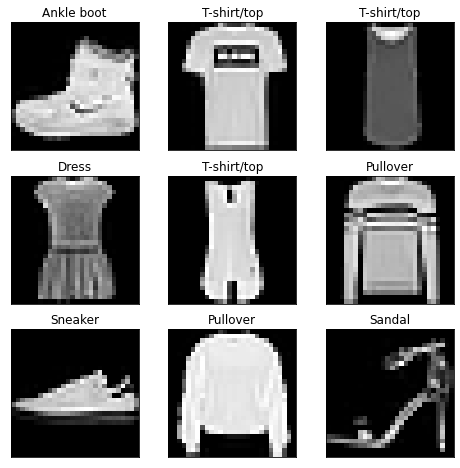

In [52]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

### Data 전처리

In [53]:
# image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

### Dataset 만들기

In [54]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

Feature batch shape: (64, 28, 28)
Labels batch shape: (64, 10)


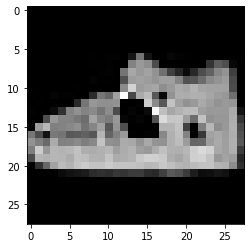

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [55]:
# Dataset을 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
imgs, lbs = next(iter(train_dataset))
print(f"Feature batch shape: {imgs.shape}")
print(f"Labels batch shape: {lbs.shape}")

img = imgs[0]
lb = lbs[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {lb}")

### Custom Dataset 만들기

In [56]:
a = np.arange(10)
print(a)

ds_tensors = tf.data.Dataset.from_tensor_slices(a)
print(ds_tensors)

for x in ds_tensors:
    print (x)

[0 1 2 3 4 5 6 7 8 9]
<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [57]:
# data 전처리(변환), shuffle, batch 추가
ds_tensors = ds_tensors.map(tf.square).shuffle(10).batch(2)

In [58]:
for _ in range(3):
    for x in ds_tensors:
        print(x)
    print('='*50)

tf.Tensor([49  9], shape=(2,), dtype=int32)
tf.Tensor([36 64], shape=(2,), dtype=int32)
tf.Tensor([16 81], shape=(2,), dtype=int32)
tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor([ 0 25], shape=(2,), dtype=int32)
tf.Tensor([49 36], shape=(2,), dtype=int32)
tf.Tensor([81  4], shape=(2,), dtype=int32)
tf.Tensor([ 1 64], shape=(2,), dtype=int32)
tf.Tensor([0 9], shape=(2,), dtype=int32)
tf.Tensor([25 16], shape=(2,), dtype=int32)
tf.Tensor([ 4 36], shape=(2,), dtype=int32)
tf.Tensor([9 0], shape=(2,), dtype=int32)
tf.Tensor([25 16], shape=(2,), dtype=int32)
tf.Tensor([64 81], shape=(2,), dtype=int32)
tf.Tensor([ 1 49], shape=(2,), dtype=int32)


## Model

### Keras Sequential API 사용


In [59]:
def create_seq_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [60]:
seq_model = create_seq_model()

In [61]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Keras Functional API 사용

In [62]:
def create_func_model():
  inputs = keras.Input(shape=(28,28))
  flatten = keras.layers.Flatten()(inputs)
  dense = keras.layers.Dense(128, activation='relu')(flatten)
  drop = keras.layers.Dropout(0.2)(dense)
  outputs = keras.layers.Dense(10, activation='softmax')(drop)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [63]:
func_model = create_func_model()

In [64]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Model Class Subclassing 사용

In [65]:
class SubClassModel(keras.Model):
  def __init__(self):
    super(SubClassModel, self).__init__()
    self.flatten = keras.layers.Flatten(input_shape=(28, 28))
    self.dense1 = keras.layers.Dense(128, activation='relu')
    self.drop = keras.layers.Dropout(0.2)
    self.dense2 = keras.layers.Dense(10, activation='softmax')
  def call(self, x, training=False):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.drop(x)
    return self.dense2(x)

In [66]:
subclass_model = SubClassModel()

In [67]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  100480    
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [68]:
# 가상의 data 만들어서 예측해보기
inputs = tf.random.normal((1, 28, 28))
outputs = subclass_model(inputs)
pred = tf.argmax(outputs, -1)
print(f"Predicted class: {pred}")

Predicted class: [2]


## Traning / Validation

### Keras API 사용

In [69]:
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
history = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5520 - accuracy: 0.8077 - val_loss: 0.4424 - val_accuracy: 0.8411
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4047 - accuracy: 0.8544 - val_loss: 0.4059 - val_accuracy: 0.8541
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3701 - accuracy: 0.8656 - val_loss: 0.3728 - val_accuracy: 0.8654
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3467 - accuracy: 0.8729 - val_loss: 0.3672 - val_accuracy: 0.8674
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3296 - accuracy: 0.8789 - val_loss: 0.3530 - val_accuracy: 0.8730
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3194 - accuracy: 0.8820 - val_loss: 0.3431 - val_accuracy: 0.8756
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3054 - accuracy: 0.8865 - val_loss: 0.3427 - val_accuracy: 0.8769
Epoch 

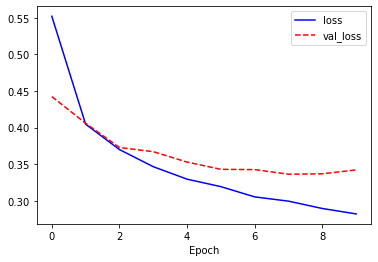

In [71]:
## Plot losses
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

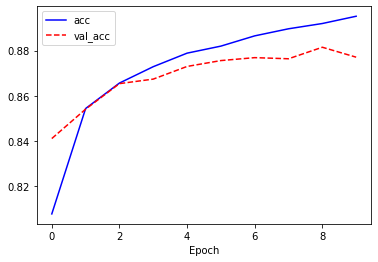

In [72]:
## Plot Accuracy
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### GradientTape 사용

In [73]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [74]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [75]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [77]:
# 속도 빠르게할때 붙임
@tf.function
# ==
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [78]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [79]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(func_model, images, labels)

  for test_images, test_labels in test_dataset:
    test_step(func_model, test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.551246702671051, Accuracy: 80.65999603271484, Test Loss: 0.43847331404685974, Test Accuracy: 84.20999908447266
Epoch 2, Loss: 0.4058576226234436, Accuracy: 85.4433364868164, Test Loss: 0.39673373103141785, Test Accuracy: 85.66999816894531
Epoch 3, Loss: 0.3706534802913666, Accuracy: 86.57167053222656, Test Loss: 0.37648746371269226, Test Accuracy: 86.08999633789062
Epoch 4, Loss: 0.34840258955955505, Accuracy: 87.34166717529297, Test Loss: 0.3732364773750305, Test Accuracy: 86.47000122070312
Epoch 5, Loss: 0.3308727443218231, Accuracy: 87.93000030517578, Test Loss: 0.3543667793273926, Test Accuracy: 87.05000305175781
Epoch 6, Loss: 0.3202137053012848, Accuracy: 88.2316665649414, Test Loss: 0.34824779629707336, Test Accuracy: 87.3499984741211
Epoch 7, Loss: 0.3067214787006378, Accuracy: 88.67499542236328, Test Loss: 0.34836506843566895, Test Accuracy: 87.22000122070312
Epoch 8, Loss: 0.29890942573547363, Accuracy: 88.84833526611328, Test Loss: 0.34136784076690674, Test 

## Model 저장하고 불러오기

### parameter만 저장하고 불러오기

In [80]:
seq_model.save_weights('seq_model.ckpt')

In [81]:
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 2.4604 - accuracy: 0.1727


[2.460381031036377, 0.17270000278949738]

In [83]:
seq_model_2.load_weights('seq_model.ckpt')

In [84]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8771


[0.34229815006256104, 0.8770999908447266]

### Model 전체를 저장하고 불러오기

In [85]:
seq_model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model\assets


In [86]:
!ls

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [87]:
seq_model_3 = keras.models.load_model('seq_model')

In [88]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8771


[0.34229815006256104, 0.8770999908447266]

## Tensorboard 사용하여 시각화하기

In [89]:
%load_ext tensorboard

### Keras Callback 사용

In [90]:
new_model_1 = create_seq_model()
new_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
new_model_1.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 2.4938 - accuracy: 0.0730


[2.4937617778778076, 0.0729999989271164]

In [92]:
log_dir = './logs/new_model_1'

tensorboard_cb = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [93]:
new_model_1.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset,
          callbacks=[tensorboard_cb])

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5526 - accuracy: 0.8074 - val_loss: 0.4516 - val_accuracy: 0.8382
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4086 - accuracy: 0.8526 - val_loss: 0.4174 - val_accuracy: 0.8498
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3706 - accuracy: 0.8652 - val_loss: 0.3819 - val_accuracy: 0.8615
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3469 - accuracy: 0.8736 - val_loss: 0.3610 - val_accuracy: 0.8694
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3320 - accuracy: 0.8777 - val_loss: 0.3563 - val_accuracy: 0.8713
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3190 - accuracy: 0.8838 - val_loss: 0.3495 - val_accuracy: 0.8723
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3060 - accuracy: 0.8869 - val_loss: 0.3550 - val_accuracy: 0.8775
Epoch 

In [94]:
%tensorboard --logdir $log_dir

### Summary Writer 사용

In [95]:
new_model_2 = create_seq_model()

In [96]:
# loss function
loss_object = keras.losses.CategoricalCrossentropy()

In [97]:
# optimizer
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [98]:
# loss, accuracy 계산
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [99]:
@tf.function
def train_step(model, images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [100]:
@tf.function
def test_step(model, images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [101]:
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [102]:
EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(new_model_2, images, labels)
  with train_summary_writer.as_default():
    tf.summary.scalar('loss', train_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch)

  for test_images, test_labels in test_dataset:
    test_step(new_model_2, test_images, test_labels)
  with test_summary_writer.as_default():
    tf.summary.scalar('loss', test_loss.result(), step=epoch)
    tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.5490134954452515, Accuracy: 80.72500610351562, Test Loss: 0.43279391527175903, Test Accuracy: 84.69000244140625
Epoch 2, Loss: 0.4067508280277252, Accuracy: 85.413330078125, Test Loss: 0.39285168051719666, Test Accuracy: 85.81999969482422
Epoch 3, Loss: 0.36952295899391174, Accuracy: 86.6933364868164, Test Loss: 0.3842519223690033, Test Accuracy: 85.94999694824219
Epoch 4, Loss: 0.34697842597961426, Accuracy: 87.38500213623047, Test Loss: 0.37458181381225586, Test Accuracy: 86.26000213623047
Epoch 5, Loss: 0.32937610149383545, Accuracy: 87.81832885742188, Test Loss: 0.3600601255893707, Test Accuracy: 86.79000091552734
Epoch 6, Loss: 0.31945592164993286, Accuracy: 88.22000122070312, Test Loss: 0.3399065136909485, Test Accuracy: 87.51000213623047
Epoch 7, Loss: 0.30488869547843933, Accuracy: 88.72167205810547, Test Loss: 0.3431866765022278, Test Accuracy: 87.5999984741211
Epoch 8, Loss: 0.299564927816391, Accuracy: 88.88499450683594, Test Loss: 0.3292216956615448, Test A

In [103]:
%tensorboard --logdir 'logs/gradient_tape'